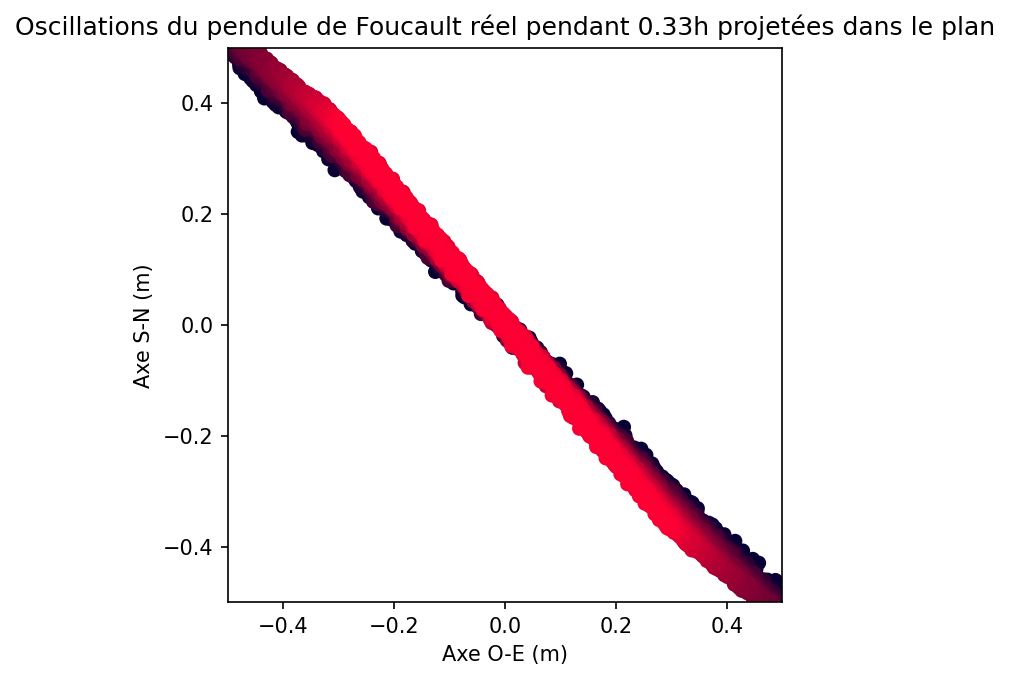

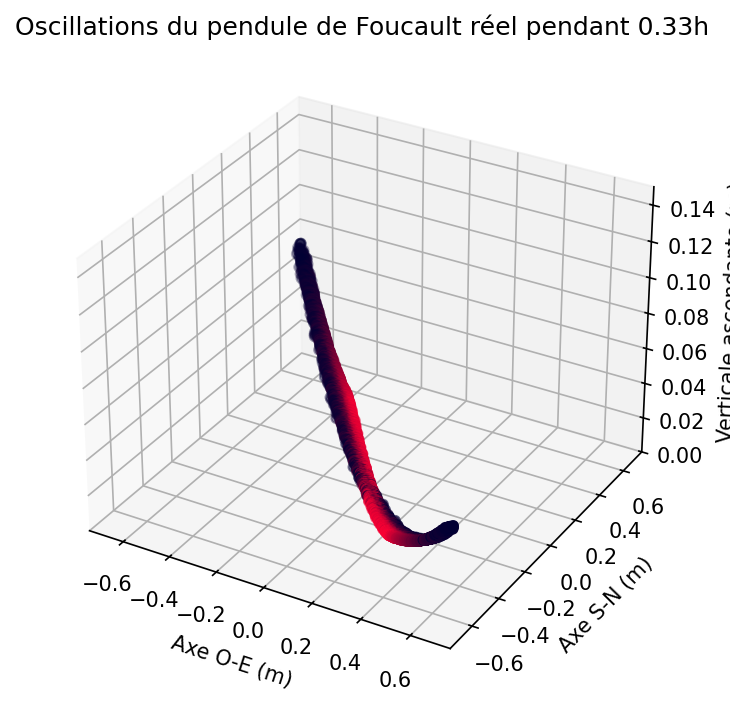

fit: -51.96401031257521


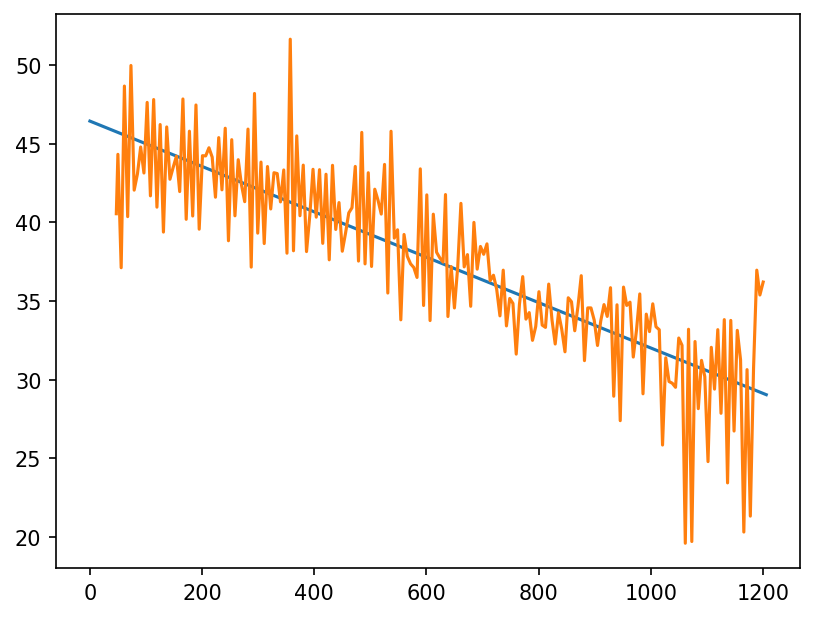

In [30]:
from scipy.integrate import solve_ivp
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150

file = "foucault.csv"

def pendule(lien, exp):
    t, x, y = [], [], []
    with open(lien, 'r') as f:
        lines = f.readlines()
    
    for line in lines[2:]:
        parts = line.split(';')
        t.append(float(parts[0].replace(",",".")))
        x.append(float(parts[1].replace(",","."))/100)
        y.append(float(parts[2].replace(",","."))/100)
    
    # Ajustement par rapport à la moyenne: Relativitée des mesures par rapport au centre
    t, x, y   = np.array(t), np.array(x), np.array(y)
    mx, my = np.mean(x), np.mean(y)
    x, y = x-mx,  y-my
    
    xmax, xmin, ymax, ymin = max(x), min(x), max(y), min(y)
    return (t,x,y, xmax, xmin, ymax, ymin)
    
a = pendule(f'C:\\Users\\Julie\\Documents\\GitHub\\foucault\\exp\\{file}', 1)

t = a[0]
x = a[1]
y = a[2]
xmax, xmin, ymax, ymin = a[3], a[4], a[5], a[6]


l = 8.6
omega = 7.2921e-5
lamb = 43.6109/180*2*pi
Cx = 0.5
pi = 3.14159
d = 10e-2
pair = 1.18
m = 4
g=9.81
sigma = -1/4*Cx*pi*(d**2)*pair
T=m*g

temps = t[-1]/3600
step = t[2]-t[1]


z = l -np.sqrt(l**2-x**2-y**2)
couleur = [(i/len(x), 0, 0.2) for i in range(len(x))]
plt.title(f"Oscillations du pendule de Foucault réel pendant {round(temps,2)}h projetées dans le plan")
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel("Axe O-E (m)")
plt.ylabel("Axe S-N (m)")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')


# Plot en 2D
plt.scatter(x,y, color=couleur)
plt.savefig(f"{file}_{round(temps,2)}_plan.png")
plt.show()

# Plot en 3D
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')  # Affichage en 3D
ax.scatter(x, y, z, c=couleur)
plt.title(f"Oscillations du pendule de Foucault réel pendant {round(temps,2)}h")
ax.set_xlabel('Axe O-E (m)')
ax.set_ylabel('Axe S-N (m)')
ax.set_zlabel('Verticale ascendante (m)')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_zlim(0,0.15)
fig.tight_layout()
plt.savefig(f"{file}_{round(temps,2)}_3d.png")
plt.show()

tps = [step*i for i in range(len(x))]
rayon = [ sqrt(x[i]**2 + y[i]**2) for i in range(len(x))]

dr = [(rayon[i+1]-rayon[i])/step for i in range(len(x)-1)]



j = 0
alpha = []
tps2 = []
for i in range(500,len(x)-2):
  
    #print(int(dr[i+1]/abs(dr[i+1])))
    if int(dr[i]/abs(dr[i])) != int(dr[i+1]/abs(dr[i+1])):
        #print(x[i])
        j += 1 
        if j%2 == 0: 
            if j %4 == 2:
                last = (x[i], y[i])
            if j %4 == 0 :
                tps2.append(i*step)
                alpha.append(-np.arctan((x[i]-last[0])/(y[i]-last[1]))*180/np.pi)
fit = np.polyfit(tps2, alpha,1 )
plt.plot(t, t*fit[0]+fit[1])
print("fit:", fit[0]*3600)

plt.plot(tps2, alpha)
plt.show()
    
